Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


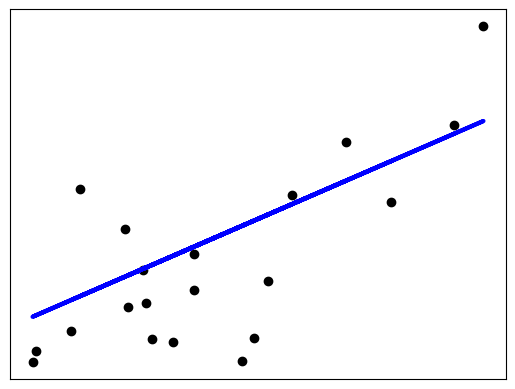

In [1]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

with open('model.pkl','wb') as f:
    pickle.dump(regr,f)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [2]:
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [3]:
diabetes_X_test

array([[ 0.07786339],
       [-0.03961813],
       [ 0.01103904],
       [-0.04069594],
       [-0.03422907],
       [ 0.00564998],
       [ 0.08864151],
       [-0.03315126],
       [-0.05686312],
       [-0.03099563],
       [ 0.05522933],
       [-0.06009656],
       [ 0.00133873],
       [-0.02345095],
       [-0.07410811],
       [ 0.01966154],
       [-0.01590626],
       [-0.01590626],
       [ 0.03906215],
       [-0.0730303 ]])

In [3]:
import skops.hub_utils as hub_utils
data = pd.DataFrame(diabetes_X_test, columns=["x"])
display(data)
hub_utils.init(model="model.pkl", requirements=["scikit-learn"], dst="lin_reg1", task="tabular-regression", data=data)

,x
0,0.077863
1,-0.039618
2,0.011039
3,-0.040696
4,-0.034229
5,0.005650
6,0.088642
7,-0.033151
8,-0.056863
9,-0.030996


In [5]:
token = "YOURTOKENHERE"
from huggingface_hub import login
login(token=token)
hub_utils.push(repo_id="skaltenp/lin_reg1", source="lin_reg1")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /Users/skaltenp/.cache/huggingface/token
Login successful


model.pkl:   0%|          | 0.00/420 [00:00<?, ?B/s]